# Variability in 10,000 year Barrier3D simulations

On April 28, Ian pushed three small changes to the overwash algorithm in Barrier3D to the Verison 2 BMI on GitHub. They included: 1) making the AvgSlope (of the barrier interior) static versus dynamic, 2) reducing the inundation regime infiltration rate (Rin_i) from 0.25 to 0.1, and 3) changing the runup and inundation regime coefficients for sediment transport (Cbb_r from 0.5 to 0.7, Cbb_i from 0.8 to 0.85). Collectively, these changes resulted in earlier drowning in my roadway management runs: on the scale of 20 years, as shown below for an example simulation with a high dune growth rate (0.75). 

<img align="left" width="600" height="600" src="RoadwayMgmtRuns.png">  

By sequentially changing each variable -- orange is the new model, blue is old -- I found that the increase in Cbb_r was largely responsible for this earlier drowning via a decrease in island width. Since the Cbb parameter governs the distance that sediment is spread across the bay (i.e., it controls the rate of exponential decay of sediment deposition across the bay) during the runup and inundation regimes, higher Cbb_r values result in less sediment deposition along the back-barrier shoreline during overwash, and hence here, earlier drowning.

I decided to go back and examine to what extent these changes to the overwash algorithm modify my 10,000 year simulation, which has been the baseline for all my CNH analysis so far. I also decided to try a different storm sequence because I noticed that the storm list used for the GRL runs was created using a 2.0 m berm elevation for empirical storm identification -- not a 1.9 m berm elevation, which is the default berm elevation used directly in Barrier3D for the GRL simulations. A secondary goal of this analysis was to check if this difference in BermEl between the storm generation algorithm and the Barrier3D model made a difference in barrier dynamics.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

sys.path.extend(['/Users/KatherineAnardeWheels/PycharmProjects/Barrier3D', '/Users/KatherineAnardeWheels/PycharmProjects/brie', '/Users/KatherineAnardeWheels/PycharmProjects/CASCADE'])

datadir = "/Users/KatherineAnardeWheels/Research/BARis/UNC/CNH/CASCADE_save_dir/Run_Output/"

In [2]:
# plot 1: new model (Rin=0.1, Cbb_r=0.7, Cbb_i=0.85), different storm sequences
b3d = []
bw = []
xs = []
storm_count = []
dune_height = []
time = []

ib3d = 0
tmax = [5725, 992, 4870, 10000, 6669]

for i in range(1, 6):
    name_prefix = "4-CASCADE_noAST_Rave_pt75_SLR_pt004_10k-yrs_0" + str(i)
    output = np.load(datadir + name_prefix + ".npz", allow_pickle=True)
    cascade = output["cascade"][0]
    b3d.append(cascade.barrier3d)
    BarrierWidth = (
                           np.array(cascade.barrier3d[ib3d].x_b_TS[0:tmax[i-1]])
                           - np.array(cascade.barrier3d[ib3d].x_s_TS[0:tmax[i-1]])
                   ) * 10
    bw.append(BarrierWidth)
    xs.append(np.array(cascade.barrier3d[ib3d].x_s_TS[0:tmax[i-1]])*10)
    storm_count.append(cascade.barrier3d[ib3d]._StormCount[0:tmax[i-1]])
    time.append(np.arange(0,tmax[i-1],1))
    dune_height.append(np.array(cascade.barrier3d[ib3d]._Hd_AverageTS[0:tmax[i-1]])*10)

(0.0, 10000.0)

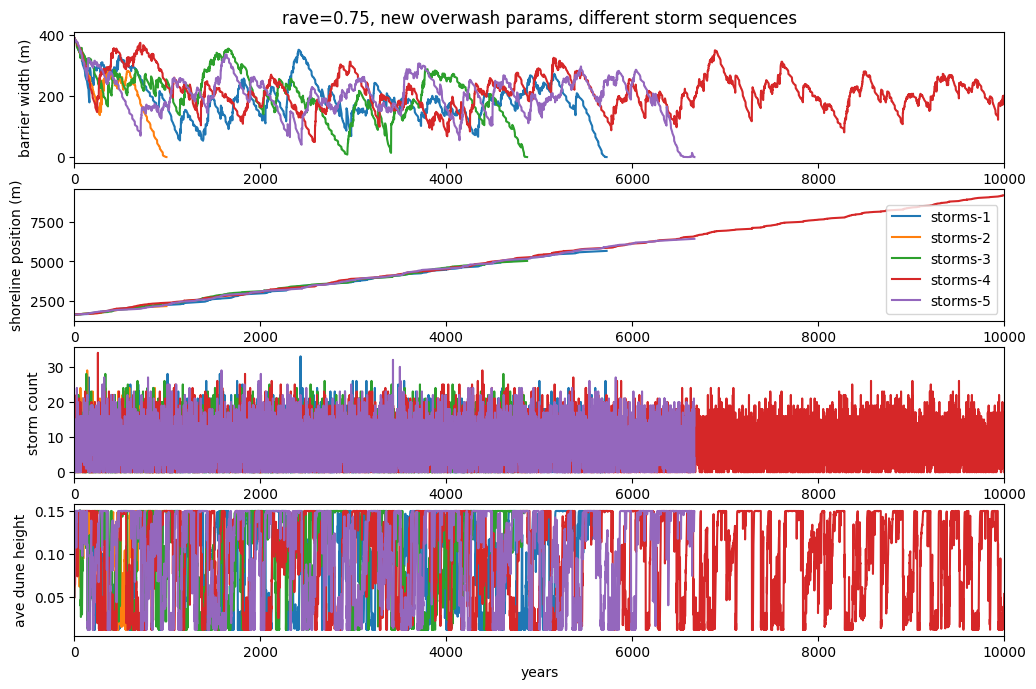

In [3]:
fig=plt.figure(figsize=(12,8), dpi=100)

tlow = 0
thigh = 10000

plt.subplot(4,1,1)
plt.plot(time[0], bw[0], time[1], bw[1], time[2], bw[2], time[3], bw[3], time[4], bw[4])
plt.title('rave=0.75, new overwash params, different storm sequences')
plt.ylabel('barrier width (m)')
plt.xlim(tlow,thigh)

plt.subplot(4,1,2)
plt.plot(time[0], xs[0], time[1], xs[1], time[2], xs[2], time[3], xs[3], time[4], xs[4])
plt.ylabel('shoreline position (m)')
plt.legend(['storms-1', 'storms-2', 'storms-3', 'storms-4', 'storms-5'])
plt.xlim(tlow,thigh)

plt.subplot(4,1,3)
plt.plot(time[0], storm_count[0], time[1], storm_count[1], time[2], storm_count[2], time[3], storm_count[3], time[4], storm_count[4])
plt.ylabel('storm count')
plt.xlabel('years')
plt.xlim(tlow,thigh)

plt.subplot(4,1,4)
plt.plot(time[0], dune_height[0], time[1], dune_height[1], time[2], dune_height[2], time[3], dune_height[3], time[4], dune_height[4])
plt.ylabel('ave dune height')
plt.xlabel('years')
plt.xlim(tlow,thigh)

If you toggle the min and max time thresholds in plot above (I suggest looking at 5000 to 8000 years), it looks like whether/when the barrier drowns is really sensitive to storm sequence during the narrow periods: if there are enough big storms, the dunes can get knocked down, leading to an increase in width and height. I was pretty shocked to see how much variability there is in time to drowning for this high dune growth rate case -- **but I think we can still rationalize using a single 10,000 year time record (i.e., storms-4 above, where the barrier doesn't drown)** to obtain an *example* "narrow (and low)" and "wide (and high)" barrier state as initial conditions for our human simulations. I'll just be very clear in the "characteristic trajectory" discussion that the trajectories are unique to each storm sequence, and for any other storm scenario, the trajectory may look quite different. **Thoughts?** Maybe it is sufficient to show similar plots to what I present above in the Supplement? I haven't done the same analysis for the low dune growth rate case, but I don't expect to see drowning in those simulations. 

Now, moving on to Ian's increase of the Cbb_r parameter from 0.5 to 0.7: the plot below shows the change in barrier width and shoreline position for storm sequence #1 above. Like I showed in the above Cbb_r sensitivity analysis for the human simulations, here we also see small changes in barrier width and position. **For consistency, I am just going to use the overwash parameters that Ian used for his GRL paper, although this modification to Cbb_r seem arbitrary**.

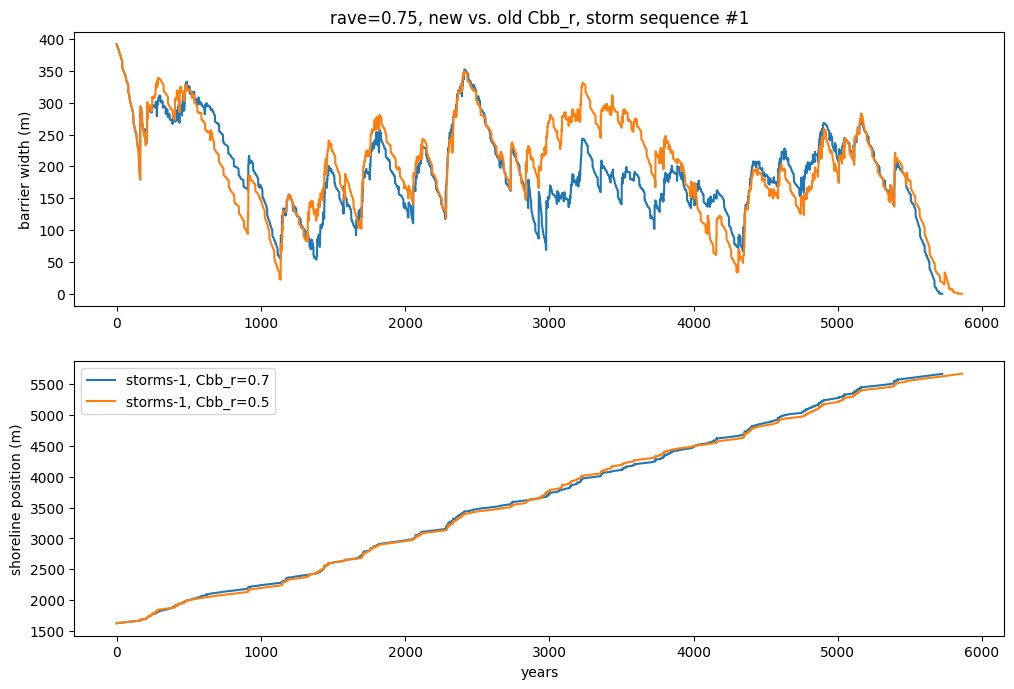

In [4]:
# take a single storm (#1), and change the Cbb_r parameter
name_prefix = "4-CASCADE_noAST_Rave_pt75_SLR_pt004_10k-yrs_01_Cbb0pt5"
output = np.load(datadir + name_prefix + ".npz", allow_pickle=True)
cascade = output["cascade"][0]
b3d_Cbbrpt5 = cascade.barrier3d
tmax = 5863
time_Cbbrpt5 = np.arange(0,tmax,1)
bw_Cbbrpt5 = (
                       np.array(b3d_Cbbrpt5[ib3d].x_b_TS[0:tmax])
                       - np.array(b3d_Cbbrpt5[ib3d].x_s_TS[0:tmax])
               ) * 10
xs_Cbbrpt5 = np.array(b3d_Cbbrpt5[ib3d].x_s_TS[0:tmax]) * 10

fig=plt.figure(figsize=(12,8), dpi= 100)

plt.subplot(2,1,1)
plt.plot(time[0], bw[0], time_Cbbrpt5, bw_Cbbrpt5)
plt.title('rave=0.75, new vs. old Cbb_r, storm sequence #1')
plt.ylabel('barrier width (m)')
plt.subplot(2,1,2)
plt.plot(time[0], xs[0], time_Cbbrpt5, xs_Cbbrpt5)
plt.ylabel('shoreline position (m)')
plt.xlabel('years')
plt.legend(['storms-1, Cbb_r=0.7', 'storms-1, Cbb_r=0.5'])

In [5]:
# now lets check if we can recreate the old 10,000 year storm, change the Cbb, and check for BermEl sensitivity
name_prefix = "4-CASCADE_noAST_Rave_pt75_SLR_pt004_10k-yrs_OLD_STORMS"
output = np.load(datadir + name_prefix + ".npz", allow_pickle=True)
cascade = output["cascade"][0]
b3d_OLDSTORMS = cascade.barrier3d
tmax = 10000
time_OLDSTORMS = np.arange(0,tmax,1)
bw_OLDSTORMS = (
                       np.array(b3d_OLDSTORMS[ib3d].x_b_TS[0:tmax])
                       - np.array(b3d_OLDSTORMS[ib3d].x_s_TS[0:tmax])
               ) * 10
xs_OLDSTORMS = np.array(b3d_OLDSTORMS[ib3d].x_s_TS[0:tmax]) * 10

name_prefix = "4-CASCADE_noAST_Rave_pt75_SLR_pt004_10k-yrs_OLD_STORMS_Cbb0pt5"
output = np.load(datadir + name_prefix + ".npz", allow_pickle=True)
cascade = output["cascade"][0]
b3d_OLDSTORMS_Cbb0pt5 = cascade.barrier3d
tmax = 10000
time_OLDSTORMS_Cbb0pt5 = np.arange(0,tmax,1)
bw_OLDSTORMS_Cbb0pt5 = (
                       np.array(b3d_OLDSTORMS_Cbb0pt5[ib3d].x_b_TS[0:tmax])
                       - np.array(b3d_OLDSTORMS_Cbb0pt5[ib3d].x_s_TS[0:tmax])
               ) * 10
xs_OLDSTORMS_Cbb0pt5 = np.array(b3d_OLDSTORMS_Cbb0pt5[ib3d].x_s_TS[0:tmax]) * 10

name_prefix = "4-CASCADE_noAST_Rave_pt75_SLR_pt004_10k-yrs_OLD_STORMS_BermEl2"
output = np.load(datadir + name_prefix + ".npz", allow_pickle=True)
cascade = output["cascade"][0]
b3d_OLDSTORMS_BermEl2 = cascade.barrier3d
tmax = 10000
time_OLDSTORMS_BermEl2 = np.arange(0,tmax,1)
bw_OLDSTORMS_BermEl2 = (
                       np.array(b3d_OLDSTORMS_BermEl2[ib3d].x_b_TS[0:tmax])
                       - np.array(b3d_OLDSTORMS_BermEl2[ib3d].x_s_TS[0:tmax])
               ) * 10
xs_OLDSTORMS_BermEl2 = np.array(b3d_OLDSTORMS_BermEl2[ib3d].x_s_TS[0:tmax]) * 10

name_prefix = "4-B3D_Rave_pt75_SLR_pt004_10k-yrs"
output = np.load(datadir + name_prefix + ".npz", allow_pickle=True)
b3d_OLDSTORMS_Orig = output["barrier3d"][0]
tmax = 10000
time_OLDSTORMS_Orig = np.arange(0,tmax,1)
bw_OLDSTORMS_Orig = (
                       np.array(b3d_OLDSTORMS_Orig.x_b_TS[0:tmax])
                       - np.array(b3d_OLDSTORMS_Orig.x_s_TS[0:tmax])
               ) * 10
xs_OLDSTORMS_Orig = np.array(b3d_OLDSTORMS_Orig.x_s_TS[0:tmax]) * 10

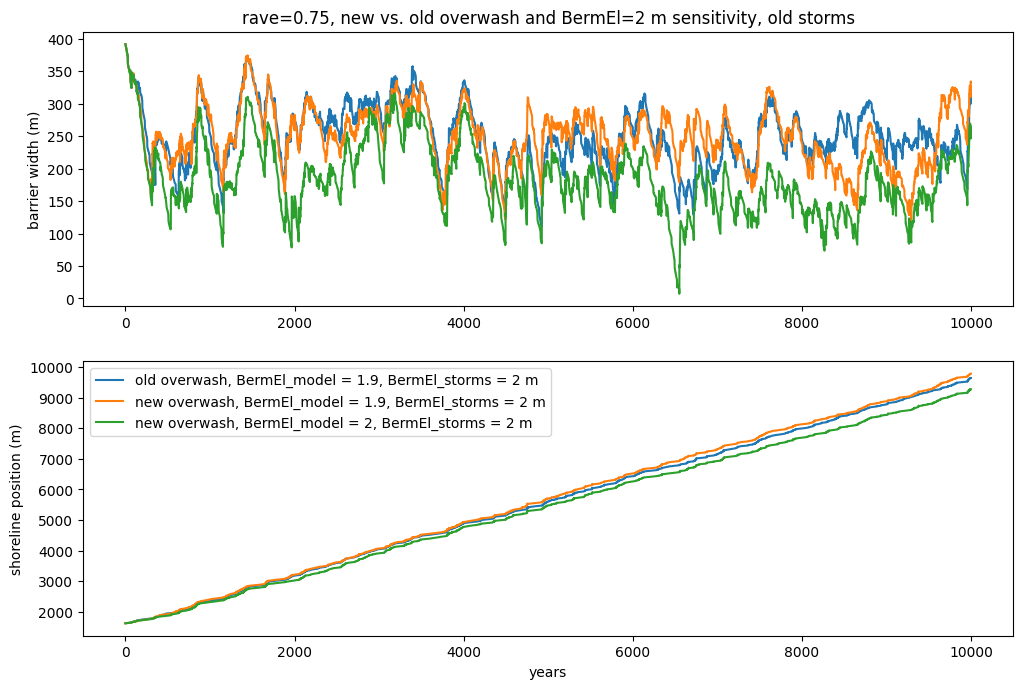

In [6]:
fig=plt.figure(figsize=(12,8), dpi= 100)

plt.subplot(2,1,1)
plt.plot(time_OLDSTORMS_Orig, bw_OLDSTORMS_Orig, time_OLDSTORMS, bw_OLDSTORMS, time_OLDSTORMS_BermEl2, bw_OLDSTORMS_BermEl2)
plt.title('rave=0.75, new vs. old overwash and BermEl=2 m sensitivity, old storms')
plt.ylabel('barrier width (m)')

plt.subplot(2,1,2)
plt.plot(time_OLDSTORMS_Orig, xs_OLDSTORMS_Orig, time_OLDSTORMS, xs_OLDSTORMS, time_OLDSTORMS_BermEl2 , xs_OLDSTORMS_BermEl2 )
plt.ylabel('shoreline position (m)')
plt.xlabel('years')
plt.legend(['old overwash, BermEl_model = 1.9, BermEl_storms = 2 m', 'new overwash, BermEl_model = 1.9, BermEl_storms = 2 m', 'new overwash, BermEl_model = 2, BermEl_storms = 2 m'])

Lastly, I wanted to see if there was a large difference in barrier dynamics due to the mismatch in BermEl between the old storm time series (2.0 m) and the Barrier3D model (1.9 m). Comparing the orange and green shoreline positions above, it looks like over long time periods (>500 years), the shoreline change rates largely diverge with the lower modeled berm elevation transgressing faster. This is likely because the storm time series is created using events that produce higher extreme water levels -- i.e., those that surpass a 2 m berm elevation -- therefore producing more runup events that exceed a berm elevation of 1.9 m. For Ian's GRL simulations, I don't think this mismatch is problematic.